# Cell Division Module example

We can use StochPy's cell division module to simulate explicit cell division in stochastic simulations.
Due to cell division the numbers of cells increases with 2^n which makes it (nearly) impossible to track all cells over many generations.

Within StochPy we therefore simulate the time evolution of one particular cell, i.e. we follow a cell lineage.

Written by TR Maarleveld, Amsterdam, The Netherlands
E-mail: tmd200@users.sourceforge.net
Last Change: August 10, 2015

We start the simulation with a initial (daughter) cell. For this set, we set e.g. the fixed growth rate and an initial volume. This allows StochPy to calculate the cell volume at the first division time. We use StochPy to do a stochastic simulation until the cell divides into two daughter cells. The mother volume and species are partioned over both daughter cells. Next, we select one of the two daughters and continue the simulation until the number of generations or the number of time steps or the specific end time is reached. 

The figure further illustrates this approach.

Now we understand the basic principles, we can start doing our first stochastic simulation with growth and division. Let's start by importing StochPy:

In [1]:
import stochpy
# required for iPython Notebook inline plotting
%matplotlib inline 


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

## Basic Example 

In our first example, we use just start the cell division module and do a stochastic simulation with cell growth and division. This means that we use all the default settings within StochPy (model, non-dividing species, growth rate, initial volume, # generations, etc.)

We use the high-level function "DoCellDivisionStochSim* to perform our first simulation and generate two plots: (i) a species copy number and volume plot and (ii) a species concentrations and volume plot.

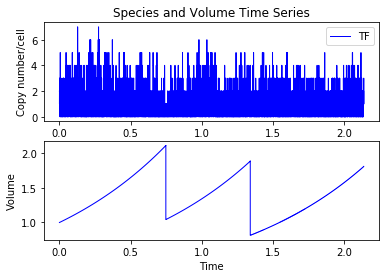

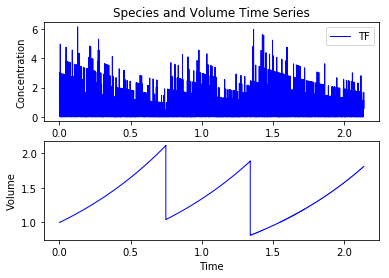

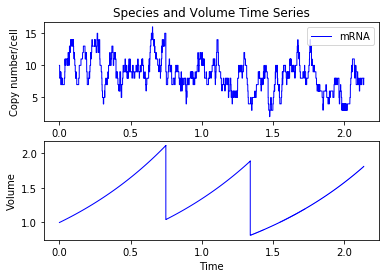

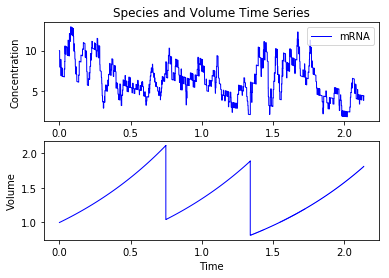

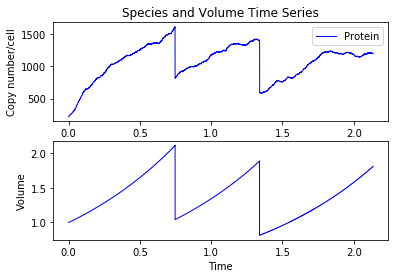

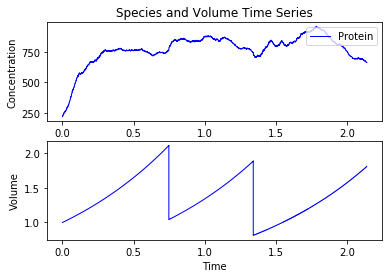

In [5]:
cmod = stochpy.CellDivision()
cmod.DoCellDivisionStochSim()
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['TF'])
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['TF'],plottype = 'concentrations')
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['mRNA'])
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['mRNA'],plottype = 'concentrations')
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['Protein'])
cmod.PlotSpeciesVolumeTimeSeries(species2plot=['Protein'],plottype = 'concentrations')

## Advanced Example

Now, we use the "ImmigrationDeath.psc" model to illustrate some more functionalities of the cell division module. First, we select the model and modify it interactively.

In [6]:
cmod.Model('ImmigrationDeath.psc')
cmod.ChangeInitialSpeciesCopyNumber("mRNA",11)
cmod.ChangeParameter("Ksyn",2)
cmod.ChangeParameter("Kdeg",0.1)

Second, we set volume and growth statistics, and perform a stochastic simulation with growth and cell division.

In [7]:
cmod.SetVolumeDistributions(Phi=("beta",5,5), K=("fixed",0.5),Phi_beta_mean=2) 
cmod.SetGrowthFunction(growth_rate=0.2, growth_type="exponential")
cmod.DoCellDivisionStochSim(end=4000, mode="generations")

stochpy/modules/StochPyCellDivision.py:1517: RuntimeWarning: invalid value encountered in double_scalars
  std = var**0.5


We generated 4000 generations to get relatively accurate statistical properties (we recommend using 10000 generations). The cell division module offers the analysis of both species and volume statistics. Here, we start with volume statistics. Here, we plot the volume distributions at birth and division for a sample of extant cells (left top panel), the volume time series (center top panel), the volume distribution for a sample of extant cells (right top panel), and the interdivision times for a sample of extant cells (center bottom panel).

/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


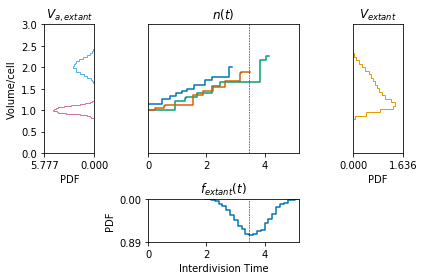

In [8]:
cmod.PlotVolumeOverview() 

Binning  and numerical integration is used to relate the sample of mother cells to different samples. StochPy prints a warning if the numerical integration was not accurate enough. Using *AnalyzeExtantCells()* with a different number of bins for both age and interdivision times should solve this issue.

In [9]:
cmod.AnalyzeExtantCells(n_bins_age=20,n_bins_IDT=20,n_bins_volume=20)

For species, a similar high-level function exists. Here, we plot the species distribution at birth and division for a sample of extant cells (left panel), the species time series (center panel), and the species distribution for a sample of extant cells (right panel). Again, by specifying a different sample, the same plot is generated whereas for a different sample.

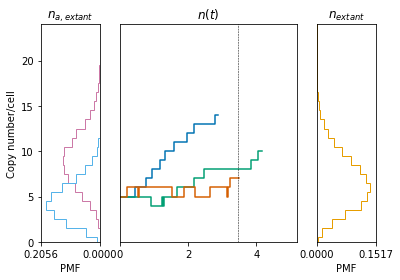

In [10]:
cmod.PlotSpeciesOverview() 